<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tarea 1: Pregunta 1</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Pregunta : Aplicacion de algoritmo k-means.


Este problema trataremos el problema de clustering, es decir, determinar los $k$ representates de un conjunto de datos y las etiquetas de estos que minimizan la distancia de cada cluster a su representante.
1. Programe el algortimo de k-means. Construya una rutina <tt> k\_means\_fit(X, Z0, NITERMAX)} </tt> donde <tt> X </tt> son los datos <tt> Z0 </tt> son los representates iniciales, y <tt> NITERMAX </tt> es el n\'umero m\'aximo de iteraciones. Esta funcion debe retornar los representantes calculados por el algoritmo, la etiquetas de cada dato, la evolucion de la funcion de costo, y el numero total e iteraciones. Ademas, programe las subrutinas:
- <tt> calcular_etiquetas(X, Z)} </tt>: dados los datos X y representantes Z calcula las etiquestas c.
- <tt> calcular_representates(X,c,k) </tt>: dados los datos X, etiquetas c, y numero de clusters k, calcula los representantes Z.
- <tt> calcular_Jclust(X,Z,c) </tt>: dados los datos X, representantes Z y etiquetas x, calcula el valor de la funcion de costo $\text{J}^{\text{clust}}$.

In [2]:
import numpy as np

def calcular_etiquetas(X, Z):
    # Calcular la distancia euclidiana entre cada punto y cada centroide
    distancias = np.linalg.norm(X[:, :, None] - Z[:, None, :], axis=0)
    # Asignar cada punto al centroide más cercano
    c = np.argmin(distancias, axis=1)
    return c

def calcular_representantes(X, c, k):
    # Calcular el nuevo centroide de cada cluster
    Z = np.array([X[:, c==i].mean(axis=1) for i in range(k)]).T
    return Z

def calcular_Jclust(X, Z, c):
    N = X.shape[1]
    J = sum(np.linalg.norm(X[:, i] - Z[:, c[i]]) ** 2 for i in range(N))
    return J / N

def k_means_fit(X, Z0, NITERMAX):
    k = Z0.shape[1]
    Z = Z0
    Jclust = []
    i = 0
    while i <= NITERMAX:
        # 1. Encontrar el vector de asignacion dado representantes fijos
        cnew = calcular_etiquetas(X, Z)
        # 2. Encontrar representantes dado etiquetas fijas
        Z = calcular_representantes(X, cnew, k)
        # Calcular la función objetivo
        Jk = calcular_Jclust(X, Z, cnew)
        Jclust.append(Jk)
        i += 1
    return Z, cnew, Jclust, i

  

2. Use la base de datos <tt> datakmeans.csv </tt> para testear su algoritmo con $k = 4$ representantes. Testee su algoritmo con el test de calculo de representantes y valor de la funcion costo. Grafique el conjunto de datos <tt> X </tt> por etiqueta y los representates de cada cluster y el comportamiento de la funcion respecto al numero de iteraciones.

In [3]:
df_kmeans = pd.read_csv("datakmeans.csv")                                                      
X = np.array(df_kmeans).T  
k = 4
Z, c, Jclust, niter = k_means_fit(X, Z0=X[:,0:k], NITERMAX=100)
assert np.linalg.norm(Z[:,0]-np.array([-5.2932233,-9.83104139])) < 1e-5, "No calculaste bien el primer representate."  


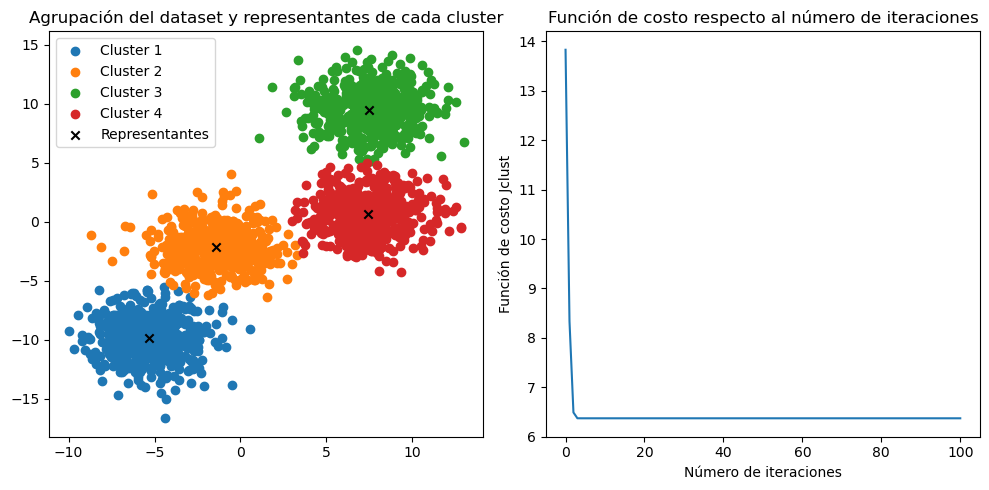

In [4]:
# Graficar los datos por etiqueta y los representantes de cada cluster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i in range(k):
    plt.scatter(X[0, c==i], X[1, c==i], label=f'Cluster {i+1}')
plt.scatter(Z[0, :], Z[1, :], c='black', marker='x', label='Representantes')
plt.title('Agrupación del dataset y representantes de cada cluster')
plt.legend()

# Graficar el comportamiento de la función de costo respecto al número de iteraciones
plt.subplot(1, 2, 2)
plt.plot(range(niter), Jclust)
plt.title('Función de costo respecto al número de iteraciones')
plt.xlabel('Número de iteraciones')
plt.ylabel('Función de costo Jclust')

plt.tight_layout()
plt.show()


In [5]:
# Note que aca hay pruebas para los otros representantes y la funcion objetivo


3. Use la base de datos de imagenes de digitos de sklearn para testear su algoritmo con $k=10$ representantes. Grafique cada representante y uno de los datos asignados a dicho cluster. Grafique el comportamiento de la funcion objetivo $J^{\textrm{clust}}$ versus al numero de iteraciones y discuta el numero de iteraciones adecuado para el clustering.

In [6]:
digits = datasets.load_digits()
X2 = np.array([arr_j.flatten() for arr_j in digits.images]).T
k2 = 10
Z2, c2, Jclust2, niter2 = k_means_fit(X2, Z0=X2[:,1000:(1000+k2)], NITERMAX=1000)

assert Jclust2[-1] < 650, "El ultimo valor de tu funcion de costo debe ser menor que 650"

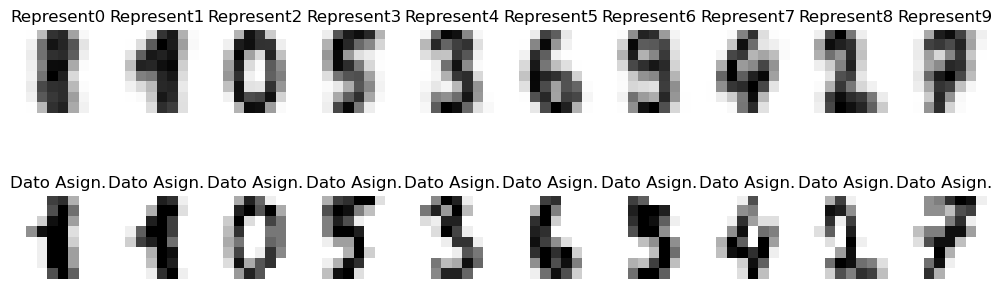

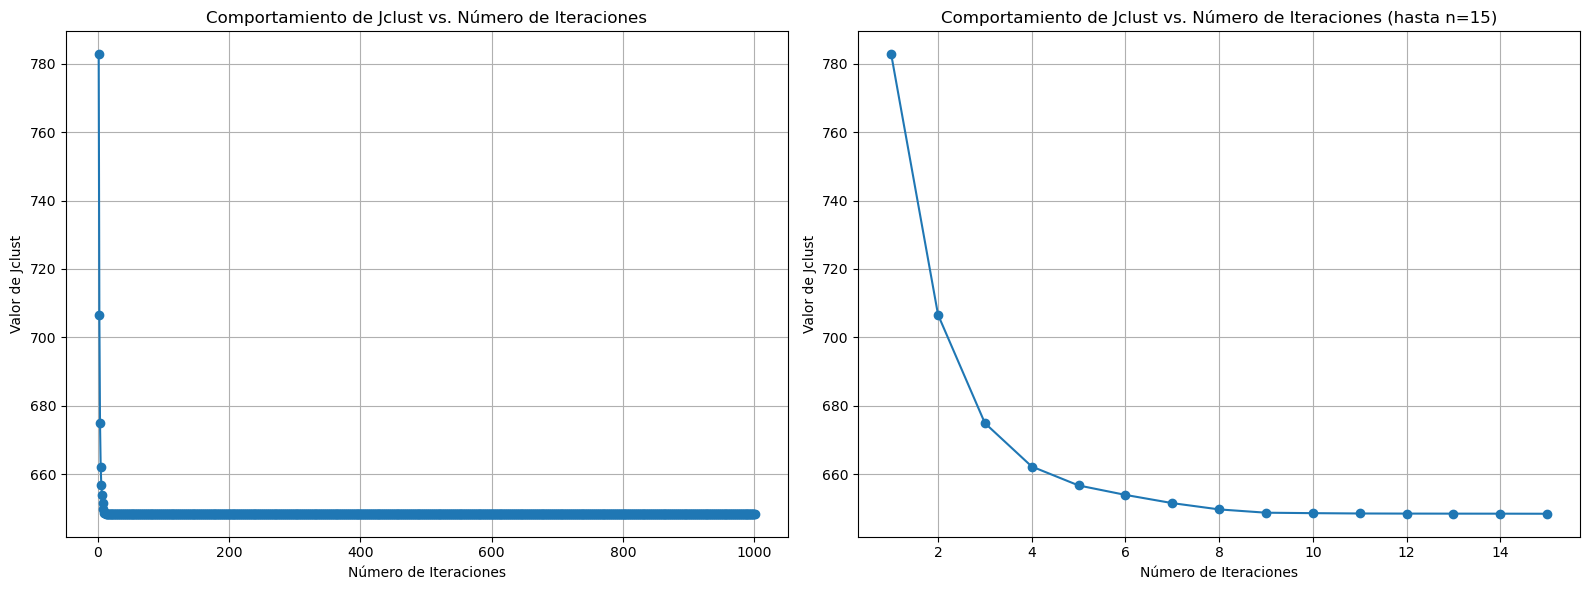

In [7]:
# Graficar cada representante y un dato asignado a dicho cluster
fig, axs = plt.subplots(2, k2, figsize=(10, 4))
for i in range(k2):
    cluster_samples = X2[:, c2 == i]
    centroid_image = Z2[:, i].reshape(8, 8)
    axs[0, i].imshow(centroid_image, cmap='binary')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Represent{i}')
    
    if cluster_samples.shape[1] > 0:  # Verificar si hay muestras en el cluster
        axs[1, i].imshow(cluster_samples[:, 0].reshape(8, 8), cmap='gray_r')
        axs[1, i].axis('off')
        axs[1, i].set_title('Dato Asign.')
    else:
        axs[1, i].set_title('No hay muestras')

plt.tight_layout()
plt.show()

# Graficar el comportamiento de la función objetivo Jclust versus el número de iteraciones
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico completo
axs[0].plot(range(1, niter2 + 1), Jclust2, marker='o', linestyle='-')
axs[0].set_xlabel('Número de Iteraciones')
axs[0].set_ylabel('Valor de Jclust')
axs[0].set_title('Comportamiento de Jclust vs. Número de Iteraciones')
axs[0].grid(True)

# Gráfico hasta la iteración 15
axs[1].plot(range(1, min(niter2, 16)), Jclust2[:15], marker='o', linestyle='-')
axs[1].set_xlabel('Número de Iteraciones')
axs[1].set_ylabel('Valor de Jclust')
axs[1].set_title('Comportamiento de Jclust vs. Número de Iteraciones (hasta n=15)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Es posible evidenciar visualmente que alrededor de la interación 10 o 12 el algortitmo ha convergido, y no es necesario realizar más iteraciones. Si quisisémos ser conservadores, se podría detener las iteracciones en n=12, donde a partir de allí no se observa una mejora significativa en la función objetivo.

In [8]:
rint = [1280,  873, 1260,   48,  959,   11,   30, 1182,  350,   96,  125]
k3 = 11
Z3, c3, Jclust3, niter3 = k_means_fit(X2, Z0=X2[:,rint], NITERMAX=1000)


4. Discuta porque el algoritmo de $k-means$ converge, es decir, es seguro que de una iteraci\'on a la siguiente la funci\'on objetivo decrece?

El hecho que Jclust disminuya en cada paso implica que el algoritmo k-means converge en un número finito de pasos. Sin embargo, dependiendo de la inicialización de los representantes, puede converger hacia óptimos locales y no globales.El algoritmo de 𝑘−𝑚𝑒𝑎𝑛𝑠 es un método iterativo que busca minimizar la suma de las distancias al cuadrado entre cada observación y el representante de su cluster asignado. La convergencia del algoritmo se puede entender en términos de una función objetivo que se minimiza en cada paso.

En cada iteración, el algoritmo realiza dos pasos:

* Paso de asignación: Cada punto se asigna al representante más cercano.
* Paso de actualización: Los representantes se recalculan como el promedio de todos los puntos asignados a ese cluster.

Estos dos pasos se repiten hasta que los centroides no cambien significativamente entre iteraciones, lo que indica que el algoritmo ha convergido.

La función objetivo del algoritmo 𝑘−𝑚𝑒𝑎𝑛𝑠 siempre disminuye o permanece igual en cada iteración, lo que significa que el algoritmo converge. Sin embargo, es importante resaltar que el algoritmo puede converger a un mínimo local en lugar de un mínimo global, dependiendo de los representantes iniciales. Cabe recordar que la inicialización de los representantes se hace de manera aleatoria. Es por eso que a menudo se ejecuta 𝑘−𝑚𝑒𝑎𝑛𝑠 varias veces con diferentes inicializaciones y se elige la solución con la función objetivo más baja.

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tarea 1: Pregunta 2</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [9]:
import numpy as np
# para calcular coordenadas en la base de coseno discreta
from scipy.fft import dctn, idctn
# para calcular coordenadas en la base de wavelets de Haar
# !pip install PyWavelets
import pywt
import matplotlib as mpl
import matplotlib.pyplot as plt

## Descomposiciones _ralas_ y compresión de imágenes
En este problema estudiaremos descomposiciones _ralas_ (o _sparse_) de una imagen y como estas se pueden usar para comprimir imágenes con pérdida. 

La imagen que usaremos en esta tarea es de $1024\times 1024$ pixeles y es una foto del Centro de Innovación UC.

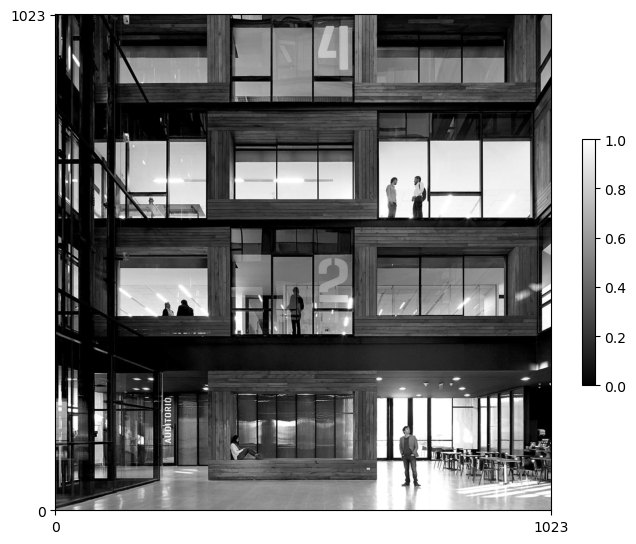

In [10]:
# usamos la variable X en toda esta tarea para designar la imagen
X = np.flipud(plt.imread('MDS3120_CIN.png'))
X = np.mean(X, axis=2)
# normalización
X = (X - np.min(np.abs(X)))/(np.max(np.abs(X)) - np.min(np.abs(X)))
# número de pixeles
N = X.shape[0]

plt.figure(figsize=(8, 8))
plt.imshow(X, vmin=0, vmax=1, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

<h3 id='coords'> Cálculo de coordenadas en la base del coseno discreto y de la transformada de wavelets </h3>
Las siguientes funciones implementan las funciones que permiten calcular las coordenadas de una imagen en la base de wavelets de Haar (o ``wavelets``) y la base de coseno discreto (o ``dct``). Recuerde que ambas bases son **ortonormales**.

**NOTA:** Recuerde que las coordenadas tanto en la base de wavelets de Haar como de coseno discreto se representan como un arreglo de $1024 \times 1024$.

In [11]:
def coordenadas_wavelets(X):
    # verifica tamaño 
    if X.shape[0] != N or X.shape[1] != N:
        raise ValueError('La imagen a usar es de 512 x 512 pixeles')
    # coordenadas de X en la base de wavelets de Haar
    WX = pywt.wavedec2(X, 'haar', mode='periodic', level=None)
    return pywt.coeffs_to_array(WX)[0]

def coordenadas_dct(X):
    # verifica tamaño 
    if X.shape[0] != N or X.shape[1] != N:
        raise ValueError('La imagen a usar es de 512 x 512 pixeles')
    # coordenadas de X en la base de coseno discreto
    return dctn(X, norm="ortho")

<h3 id='coords'> Ordenando coordenadas en orden decreciente de magnitud </h3>

### Pregunta 1:  
Escriba una función que toma como entrada las coordenadas de la imagen ``X`` y retorna un vector con la magnitud de las coordenadas ordenadas en orden decreciente. 


In [12]:
def ordena_magnitud_coordenadas(C):
    # your code here
    magnitudes = np.abs(C.flatten())
    sorted_magnitudes = np.sort(magnitudes)[::-1]  # Ordena las magnitudes en orden decreciente
    return sorted_magnitudes



In [13]:
# use este arreglo como entrada a su función
C_in = np.array([
                [ +1, -2, +3 ],
                [ -4, +5, -6 ],
                [ +7, -8, +9 ]
            ])
c = ordena_magnitud_coordenadas(C_in)
assert np.all(np.array([ 9, 8, 7, 6, 5, 4, 3, 2, 1 ]) == c), "Resultado incorrecto." 

### Pregunta 2: 
Calcule las coordenadas de la imagen ``X`` en la base de wavelets de Haar y de coseno discreto y ordene las coordenadas de acuerdo a su magnitud en orden decreciente.

In [14]:
def calcular_c_haar(X):
    # Calcula y ordena las coordenadas en la base de wavelets de Haar
    WX = pywt.wavedec2(X, 'haar', mode='periodic', level=None)
    coef_array = pywt.coeffs_to_array(WX)[0]
    sorted_coef_magnitude = ordena_magnitud_coordenadas(coef_array)
    return sorted_coef_magnitude

def calcular_c_dct(X):
    # Calcula y ordena las coordenadas en la base de coseno discreto
    DCT_coef = dctn(X, norm="ortho")
    sorted_dct_magnitude = ordena_magnitud_coordenadas(DCT_coef)
    return sorted_dct_magnitude


### Pregunta 3:
Use el código provisto para graficar en una misma figura las magnitudes de la imagen en cada base en orden decreciente. ¿Por qué en un caso la magnitud de las coordenadas decae más rápido que el otro?

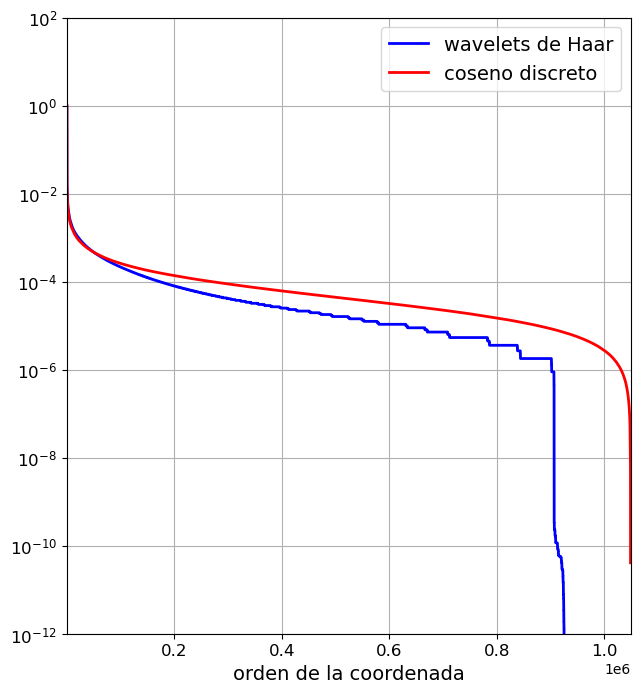

In [15]:
c_haar = calcular_c_haar(X)
c_dct = calcular_c_dct(X)

n = np.linspace(1, N ** 2, N ** 2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(n, c_haar/c_haar[0], label='wavelets de Haar', linewidth=2, color='b')
plt.plot(n, c_dct/c_dct[0], label='coseno discreto', linewidth=2, color='r')
plt.xlim([ 1, N ** 2 ])
plt.ylim([ 1E-12, 1E2 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('orden', fontsize=14)
plt.xlabel('orden de la coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.show()

La base de wavelets de Haar y la base de coseno discreto tienen diferentes “formas” y, por lo tanto, representan diferentes tipos de información en una imagen.

La base de coseno discreto tiende a ser buena para representar información de baja frecuencia (como colores de fondo suaves y uniformes). Son eficaces para representar variaciones suaves en una señal, como las regiones de color uniforme en una imagen.

Las bases de wavelet son particularmente eficaces para representar cambios abruptos en una señal y detalles de alta frecuencia (como bordes nítidos). Por lo tanto, si una imagen tiene muchos bordes o cambios abruptos de intensidad, es posible que las coordenadas de magnitud en la base de wavelets de Haar decaigan más rápidamente. 

Este es el caso de la imagen que estamos analizando, la cual cuento con muchos cambios de intensidad y bordes. Por tal razón, es posible evidenciar una caída más rápida en la magnitud de las coordenadas en la base de wavelets de Haar en comparación con la base de coseno discreto para este caso particular.

<h3 id='coords'> Mejor aproximación </h3>
En este problema construimos una aproximación usando las coordenadas de mayor magnitud y reemplazando el resto por el valor cero. Considere una base ortonormal $v_1,\ldots, v_d$ en $\mathbb{R}^d$ y la expansión de un vector
$$
    x = c_1 v_1 + \ldots + c_d v_d.
$$
Si queremos encontrar una aproximación usando las $m$ coordenadas de mayor magnitud, entonces primero debemos ordenar las coordenadas por orden decreciente de magnitud, esto es,
$$
    |c|_{(1)} \geq  \ldots \geq |c|_{(d)}\geq 0
$$
entonces la aproximación $\tilde{x}$ de $x$ con las $k$ coordenadas de mayor magnitud tiene coordenadas
$$
    \tilde{c}_i = \begin{cases}
        c_i & \text{si $|c_i| \geq |c|_{(k)}$}\\
        0 & \text{si $|c_i| < |c|_{(k)}$}
    \end{cases}
$$
y por lo tanto $\tilde{x}$ se representa como 
$$
    \tilde{x} = \tilde{c}_1 v_1 + \ldots + \tilde{c}_d v_d.
$$

### Pregunta 4:
Escriba una función que toma como argumentos el arreglo ``C`` de coordenadas de una imagen y un entero ``k`` y entrega el arreglo ``Ct`` correspondiente a las coordenadas de la mejor aproximación con $k$ elementos. **Asuma que el índice ``k`` va desde 1 hasta el número de pixeles de la imagen.**

In [16]:
def coordenadas_aproximacion_k_elementos(C, k):
    abs_C = np.abs(C.flatten())
    sorted_magnitudes = ordena_magnitud_coordenadas(C)
    umbral = sorted_magnitudes[k - 1] if k <= len(sorted_magnitudes) else 0
    result = np.where(abs_C >= umbral, C.flatten(), 0)
    return result.reshape(C.shape)

In [17]:
# use este arreglo como entrada a su función
C_in = np.array([
                [ +9, -8, +3 ],
                [ -2, +7, -1 ],
                [ +0, -8, -9 ]
            ])
# PRUEBA #1
k_in = 3
C_out = np.array([
                [ +9, -8,  0 ],
                [  0,  0,  0 ],
                [  0, -8, -9 ]
            ])
assert np.all(C_out == coordenadas_aproximacion_k_elementos(C_in, k_in)), print('Resultado incorrecto. El resultado correcto es:\n', C_out)

# PRUEBA #2
k_in = 4

C_out = np.array([
                [ +9, -8,  0 ],
                [  0,  0,  0 ],
                [  0, -8, -9 ]
            ])
assert np.all(C_out == coordenadas_aproximacion_k_elementos(C_in, k_in)), print('Resultado incorrecto. El resultado correcto es:\n', C_out)

# PRUEBA #5
k_in = 5

C_out = np.array([
                [ +9, -8,  0 ],
                [  0, +7,  0 ],
                [  0, -8, -9 ]
            ])
assert np.all(C_out == coordenadas_aproximacion_k_elementos(C_in, k_in)), print('Resultado incorrecto. El resultado correcto es:\n', C_out)

<h3 id='coords'> Comprimiendo imágenes</i> </h3>
En esta última parte del problema, estudiamos cómo se pueden usar sus resultados previos para comprimir imágenes. Para ello, implementamos las funciones que nos permiten calcular una imagen ``Y`` a partir de sus coordenadas en la base de wavelets de Haar y de coseno discreto. 

**NOTA:** Recuerde que las coordenadas tanto en la base de wavelets de Haar como de coseno discreto se representan como un arreglo de $1024 \times 1024$.

In [18]:
def coordenadas_wavelets_a_imagen(C):
    # verifica tamaño 
    if C.shape[0] != N or C.shape[1] != N:
        raise ValueError('Las coordenadas se deben representar como un arreglo de 512 x 512 pixeles')
    # imagen calculada de sus coordenadas en la base de wavelets de Haar
    _, BWX = pywt.coeffs_to_array(pywt.wavedec2(np.zeros((N, N)), 'haar', mode='periodic', level=None))
    return pywt.waverec2(pywt.array_to_coeffs(C, BWX, output_format='wavedec2'), 'haar', mode='periodic')

def coordenadas_dct_a_imagen(C):
    # verifica tamaño 
    if C.shape[0] != N or C.shape[1] != N:
        raise ValueError('Las coordenadas se deben representar como un arreglo de 512 x 512 pixeles')
    # imagen calculada de sus coordenadas de X en la base de coseno discreto
    return idctn(C, norm="ortho")

### Pregunta 5:
Grafique las imágenes que obtiene usando la mejor aproximación con el 1%, 5% y 10% de las coordenadas de mayor magnitud en la base de wavelet de Haar y de coseno discreto. Discuta las diferencias que ve en las imágenes en cada caso.

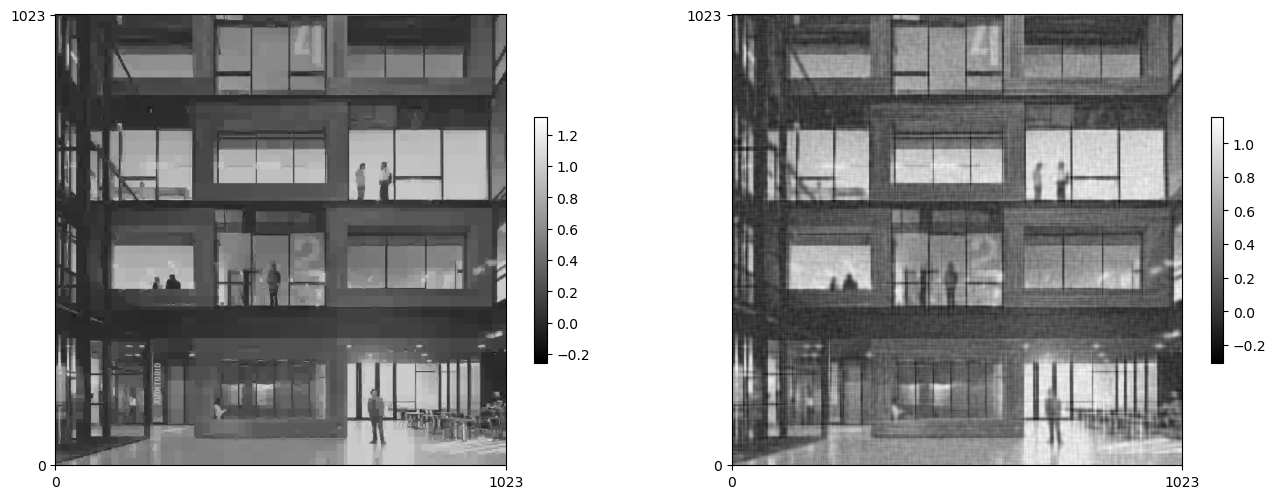

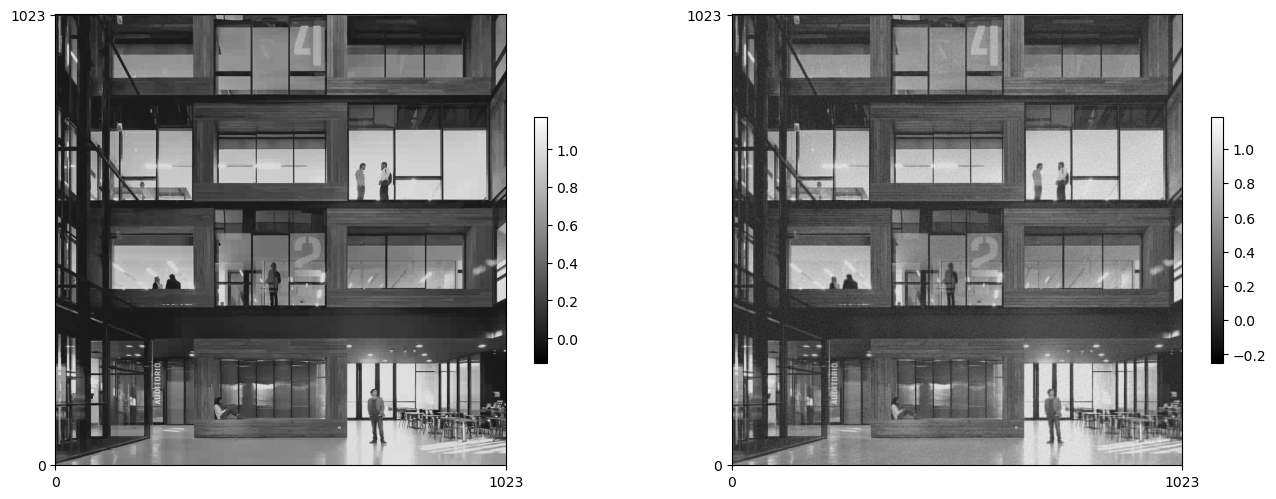

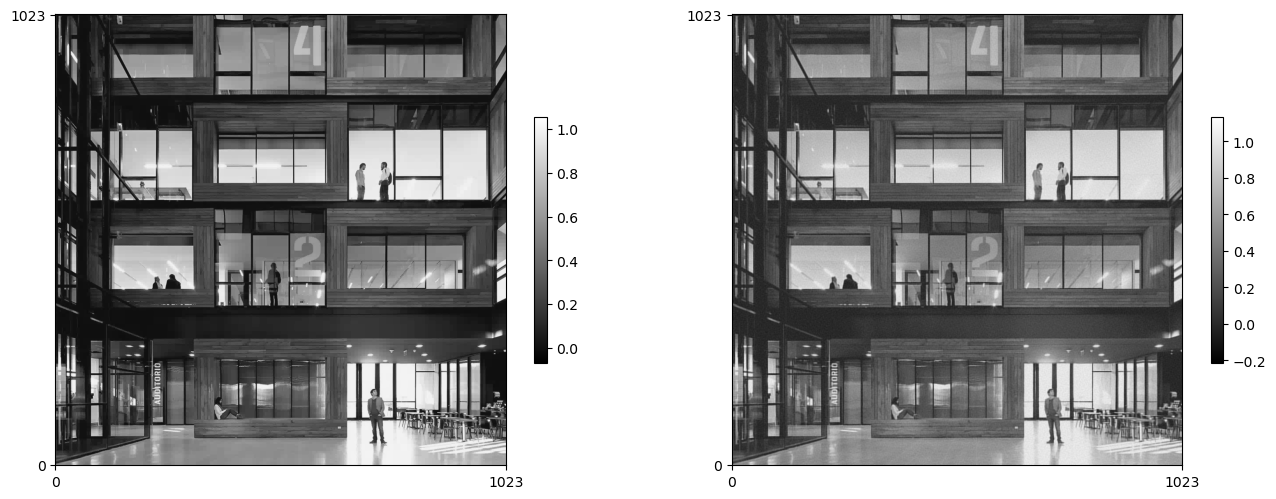

In [19]:
C_haar = coordenadas_wavelets(X)
C_dct = coordenadas_dct(X)

for k in [ int(0.01 * X.size), int(0.05 * X.size), int(0.10 * X.size) ]:
    # Calcular las mejores aproximaciones
    Ct_haar = coordenadas_aproximacion_k_elementos(C_haar, k)
    Ct_dct = coordenadas_aproximacion_k_elementos(C_dct, k)

    # Calcular las imágenes a partir de las mejores aproximaciones
    _X_haar = coordenadas_wavelets_a_imagen(Ct_haar)
    _X_dct = coordenadas_dct_a_imagen(Ct_dct)

    # Graficar las imágenes
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(_X_haar, origin='lower', cmap='gray')
    plt.xticks([ 0, N - 1 ])
    plt.yticks([ 0, N - 1 ])
    plt.colorbar(shrink=0.4)

    plt.subplot(1, 2, 2)
    plt.imshow(_X_dct, origin='lower', cmap='gray')
    plt.xticks([ 0, N - 1 ])
    plt.yticks([ 0, N - 1 ])
    plt.colorbar(shrink=0.4)

    plt.show()

El analizar las imagenes resultantes con la base del coseno discreto, se evidencia que al quitar los coeficientes de menor valor, se presentan perturbaciones de ruido, seguramente producto de quitar frecuencias muy altas. Mientras que la  con bases de wavelet de Haar evidencian una imagen "más lisa" y "pixelada".

Como mencionamos previamente, las bases de wavelet son particularmente eficaces para representar cambios abruptos en una señal y detalles de alta frecuencia (como bordes nítidos). Siendo el caso de esta imagen precisamente ese, con muchos bordes y cambios de intensidad, las coordenadas de magnitud en la base de wavelets de Haar decaen más rápidamente que las bases de coseno discreto.  

Los métodos de compresión wavelet son adecuados para representar transitorios, como sonidos de percusión en audio, o componentes de alta frecuencia en imágenes bidimensionales, como lo es esta imagen. Esto significa que los elementos transitorios de una señal de datos pueden representarse mediante una cantidad menor de información que si se hubiera utilizado alguna otra transformada, como la más extendida transformada discreta del coseno.

Por esta razón, la compresión wavelet nos está entregando una imagen más nítida que la transformada del coseno discreto.